In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5178387


In [5]:
!mkdir $LOCAL/sandbox

In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5178387/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [9]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [10]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [11]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [12]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [13]:
traintest.num_dataset()

5

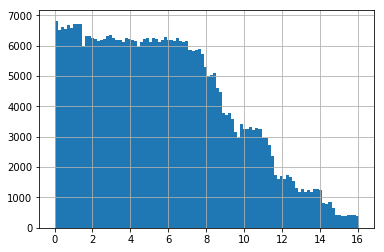

In [14]:
traintest.ydf.hist(bins=100);

In [15]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [16]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [17]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [18]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [19]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [20]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [21]:
qdf=qdf[~qdf['index'].isin({0,16,2,7})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((333016, 1), (333016, 100), (333016,))

In [22]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{1: 29606, 3: 22721, 4: 32572, 5: 20661, 6: 18112, 8: 20285, 9: 24722, 10: 29316, 11: 28282, 12: 22648, 13: 21974, 14: 37848, 15: 24269}'

In [23]:
quakes=set(qdf['index'])
quakes

{1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15}

In [24]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [25]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sum(delta*delta,1)
    aindex=np.argsort(delta) 
    return list(aindex[:n])
    

In [26]:
testX=testdf.values
testX.shape

(2624, 100)

In [27]:
trainX=datadf.values
trainX.shape, qdf.shape

((333016, 100), (333016, 1))

In [28]:
%%time
topidxs  = []
for testv in testX:
    a = topn(testv,3000,trainX)
    topidxs += a

CPU times: user 2h 21min 9s, sys: 5min 6s, total: 2h 26min 15s
Wall time: 14min 13s


In [29]:
len(topidxs),len(set(topidxs)),len(testX),len(topidxs)/len(testX)

(7872000, 291332, 2624, 3000)

In [30]:
qdf.iloc[topidxs].head()

index
index                    
quake_14_o36802555     14
quake_14_o38855409     14
quake_14_o36716466     14
quake_14_o38868096     14
quake_14_o36697969     14

In [31]:
idxdf=pd.DataFrame(np.array(qdf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))

In [32]:
idxdf.shape

(3000, 2624)

In [33]:
idxdf.head()

0     1     2     3     4     5     6     7     8     9     ...  2614  \
0    14    14    13     4    15     9    14     8     9    14  ...    15   
1    14    14    13     4    15     9    14    10     5    14  ...    15   
2    14    14    13     4    15     9    14    13    10    14  ...    15   
3    14    14    13     4    15     9    14    10     3    14  ...    15   
4    14    14    13     4    15     9     6    13     9    14  ...    15   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0    14    14    15    15    11    15    15     8    15  
1    14    14    15    15    15    15    15     8    15  
2    14    10    15     1    11    15    15     8    15  
3    14    10    15     1     1    15    15     8     1  
4    14     1    15     1    12    15    15     8    15  

[5 rows x 2624 columns]

In [34]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:1000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.sort_index(ascending=False).cumsum(0)/len(testX),2))

1 3 4 5 6 8 9 10 11 12 13 14 15 


0                                                                    \
qno      1     3     4     5     6     8     9     10    11    12    13    14   
index                                                                           
0.0    0.54  0.88  0.70  0.65  0.55  0.74  0.68  0.48  0.76  0.88  0.77  0.19   
0.1    0.32  0.08  0.21  0.28  0.31  0.22  0.24  0.33  0.22  0.10  0.21  0.24   
0.2    0.11  0.03  0.06  0.07  0.11  0.04  0.06  0.13  0.02  0.01  0.02  0.18   
0.3    0.02  0.00  0.02  0.00  0.03  0.00  0.02  0.05  0.00  0.00  0.00  0.09   
0.4    0.00  0.00  0.00  0.00  0.00   NaN  0.00  0.01   NaN   NaN   NaN  0.06   
0.5    0.00   NaN   NaN   NaN   NaN   NaN  0.00  0.00   NaN   NaN   NaN  0.05   
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.05   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.05   
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.01   

             
qno      15  
index        
0.0    0.35  
0.1    0.26  
0.2    0.11  
0.3    0.05  
0.4    0.04  
0.5    0.03  
0.6    0.02  
0.7    0.02  
0.8    0.02  
0.9    0.03  
1.0    0.08

0                                                                    \
qno      1     3     4     5     6     8     9     10    11    12    13    14   
index                                                                           
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.01   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.06   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.10   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.15   
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.19   
0.5    0.00   NaN   NaN   NaN   NaN   NaN  0.00  0.00   NaN   NaN   NaN  0.25   
0.4    0.00  0.00  0.00  0.00  0.00   NaN  0.01  0.01   NaN   NaN   NaN  0.30   
0.3    0.03  0.00  0.02  0.00  0.03  0.00  0.02  0.06  0.00  0.00  0.00  0.39   
0.2    0.14  0.04  0.08  0.07  0.14  0.04  0.08  0.19  0.02  0.02  0.02  0.58   
0.1    0.46  0.12  0.30  0.35  0.45  0.26  0.32  0.52  0.24  0.12  0.23  0.81   
0.0    1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00   

             
qno      15  
index        
1.0    0.08  
0.9    0.11  
0.8    0.13  
0.7    0.15  
0.6    0.17  
0.5    0.20  
0.4    0.24  
0.3    0.29  
0.2    0.39  
0.1    0.65  
0.0    1.00

In [35]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:2000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))

1 3 4 5 6 8 9 10 11 12 13 14 15 


0                                                                    \
qno      1     3     4     5     6     8     9     10    11    12    13    14   
index                                                                           
0.0    0.51  0.88  0.68  0.63  0.50  0.72  0.66  0.43  0.74  0.88  0.77  0.16   
0.1    0.36  0.09  0.24  0.31  0.36  0.25  0.27  0.39  0.24  0.11  0.22  0.25   
0.2    0.12  0.03  0.06  0.05  0.13  0.03  0.05  0.13  0.02  0.01  0.01  0.20   
0.3    0.01  0.00  0.02  0.00  0.02  0.00  0.01  0.04  0.00  0.00   NaN  0.08   
0.4    0.00   NaN  0.00   NaN   NaN   NaN  0.00  0.00   NaN   NaN   NaN  0.06   
0.5     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.06   
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.05   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.05   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.05   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.03   
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

             
qno      15  
index        
0.0    0.33  
0.1    0.28  
0.2    0.11  
0.3    0.05  
0.4    0.04  
0.5    0.02  
0.6    0.03  
0.7    0.02  
0.8    0.02  
0.9    0.04  
1.0    0.06

0                                                                    \
qno      1     3     4     5     6     8     9     10    11    12    13    14   
index                                                                           
0.0    0.51  0.88  0.68  0.63  0.50  0.72  0.66  0.43  0.74  0.88  0.77  0.16   
0.1    0.87  0.97  0.92  0.94  0.86  0.97  0.94  0.82  0.98  0.99  0.99  0.42   
0.2    0.99  1.00  0.98  1.00  0.98  1.00  0.99  0.95  1.00  1.00  1.00  0.62   
0.3    1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00   NaN  0.70   
0.4    1.00   NaN  1.00   NaN   NaN   NaN  1.00  1.00   NaN   NaN   NaN  0.75   
0.5     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.81   
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.86   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.92   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.97   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00   
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

             
qno      15  
index        
0.0    0.33  
0.1    0.61  
0.2    0.72  
0.3    0.77  
0.4    0.81  
0.5    0.84  
0.6    0.86  
0.7    0.88  
0.8    0.90  
0.9    0.94  
1.0    1.00

In [36]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:3000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))   

1 3 4 5 6 8 9 10 11 12 13 14 15 


0                                                                    \
qno      1     3     4     5     6     8     9     10    11    12    13    14   
index                                                                           
0.0    0.48  0.87  0.67  0.62  0.46  0.71  0.66  0.40  0.73  0.88  0.77  0.14   
0.1    0.40  0.10  0.25  0.33  0.40  0.26  0.28  0.43  0.25  0.11  0.22  0.27   
0.2    0.11  0.02  0.07  0.05  0.13  0.03  0.05  0.13  0.02  0.01  0.01  0.21   
0.3    0.01  0.00  0.01   NaN  0.01  0.00  0.01  0.04  0.00  0.00   NaN  0.08   
0.4    0.00   NaN  0.00   NaN   NaN   NaN   NaN  0.00   NaN   NaN   NaN  0.06   
0.5     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.06   
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.06   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.07   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.05   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.01   
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

             
qno      15  
index        
0.0    0.31  
0.1    0.31  
0.2    0.10  
0.3    0.06  
0.4    0.04  
0.5    0.03  
0.6    0.03  
0.7    0.02  
0.8    0.02  
0.9    0.05  
1.0    0.04

0                                                                    \
qno      1     3     4     5     6     8     9     10    11    12    13    14   
index                                                                           
0.0    0.48  0.87  0.67  0.62  0.46  0.71  0.66  0.40  0.73  0.88  0.77  0.14   
0.1    0.88  0.98  0.92  0.95  0.86  0.97  0.94  0.83  0.98  0.99  0.99  0.41   
0.2    0.99  1.00  0.99  1.00  0.99  1.00  0.99  0.96  1.00  1.00  1.00  0.62   
0.3    1.00  1.00  1.00   NaN  1.00  1.00  1.00  1.00  1.00  1.00   NaN  0.70   
0.4    1.00   NaN  1.00   NaN   NaN   NaN   NaN  1.00   NaN   NaN   NaN  0.76   
0.5     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.82   
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.88   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.94   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.99   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00   
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

             
qno      15  
index        
0.0    0.31  
0.1    0.61  
0.2    0.72  
0.3    0.78  
0.4    0.82  
0.5    0.84  
0.6    0.87  
0.7    0.89  
0.8    0.91  
0.9    0.96  
1.0    1.00

In [37]:
topquakes= qdf.iloc[topidxs]
topquakes['index'].value_counts().sort_index()

1      542276
3      132273
4      357461
5      369691
6      581041
8      277154
9      346715
10     661385
11     254705
12     126525
13     226451
14    2172683
15    1823640
Name: index, dtype: int64

In [38]:
topquakes= qdf.iloc[list(set(topidxs))]
topquakes['index'].value_counts().sort_index()

1     27135
3     17615
4     25236
5     19901
6     14953
8     18186
9     21763
10    28218
11    23600
12    16791
13    18554
14    35666
15    23714
Name: index, dtype: int64

In [39]:
filtered_idx=list(set(topidxs))
qdf=qdf.iloc[filtered_idx]
datadf=datadf.iloc[filtered_idx]
ydf=ydf.iloc[filtered_idx]
qdf.shape,datadf.shape,ydf.shape

((291332, 1), (291332, 100), (291332,))

In [40]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [41]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [42]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  1 1 (nan, nan)
valid quake 3 train quake 1
(27135, 100) (27135,) (17615, 100) (17615,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07	valid_1's l1: 1.75687
[100]	training's l1: 0.729165	valid_1's l1: 1.63697
[150]	training's l1: 0.566499	valid_1's l1: 1.60962
[200]	training's l1: 0.478944	valid_1's l1: 1.60679
[250]	training's l1: 0.42981	valid_1's l1: 1.60724
[300]	training's l1: 0.39585	valid_1's l1: 1.60802
[350]	training's l1: 0.370961	valid_1's l1: 1.60837
[400]	training's l1: 0.350087	valid_1's l1: 1.60984
Early stopping, best iteration is:
[245]	training's l1: 0.434061	valid_1's l1: 1.60629
quake  1 3 (1.6062876433627113, 245)
valid quake 4 train quake 1
(27135, 100) (27135,) (25236, 100) (25236,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07	valid_1's l1: 2.06456
[100]	training's l1: 0.729165	valid_1's l1: 2.0508
[150]	training's l1: 0.566499	valid_1's l1: 2.06511
[200]	training's l1: 0.47

[250]	training's l1: 0.42981	valid_1's l1: 2.78342
[300]	training's l1: 0.39585	valid_1's l1: 2.78056
[350]	training's l1: 0.370961	valid_1's l1: 2.7816
[400]	training's l1: 0.350087	valid_1's l1: 2.78273
[450]	training's l1: 0.332445	valid_1's l1: 2.78293
Early stopping, best iteration is:
[289]	training's l1: 0.4022	valid_1's l1: 2.7804
quake  1 14 (2.7804018412648754, 289)
valid quake 15 train quake 1
(27135, 100) (27135,) (23714, 100) (23714,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07	valid_1's l1: 1.80671
[100]	training's l1: 0.729165	valid_1's l1: 1.85593
[150]	training's l1: 0.566499	valid_1's l1: 1.90036
[200]	training's l1: 0.478944	valid_1's l1: 1.93066
Early stopping, best iteration is:
[16]	training's l1: 1.69009	valid_1's l1: 1.69038
quake  1 15 (1.6903760636402658, 16)
valid quake 1 train quake 3
(17615, 100) (17615,) (27135, 100) (27135,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.793

[200]	training's l1: 0.268823	valid_1's l1: 1.01959
[250]	training's l1: 0.223225	valid_1's l1: 1.02718
[300]	training's l1: 0.189783	valid_1's l1: 1.03495
Early stopping, best iteration is:
[135]	training's l1: 0.390611	valid_1's l1: 1.00941
quake  3 13 (1.0094053431634011, 135)
valid quake 14 train quake 3
(17615, 100) (17615,) (35666, 100) (35666,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.79384	valid_1's l1: 4.12724
[100]	training's l1: 0.505078	valid_1's l1: 4.2311
[150]	training's l1: 0.354169	valid_1's l1: 4.28565
[200]	training's l1: 0.268823	valid_1's l1: 4.32104
Early stopping, best iteration is:
[13]	training's l1: 1.42456	valid_1's l1: 3.85347
quake  3 14 (3.853471750483383, 13)
valid quake 15 train quake 3
(17615, 100) (17615,) (23714, 100) (23714,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.79384	valid_1's l1: 1.57753
[100]	training's l1: 0.505078	valid_1's l1: 1.54272
[150]	training's l1

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.761924	valid_1's l1: 2.58089
[100]	training's l1: 0.496895	valid_1's l1: 2.58493
[150]	training's l1: 0.354226	valid_1's l1: 2.60663
[200]	training's l1: 0.276713	valid_1's l1: 2.6271
[250]	training's l1: 0.235247	valid_1's l1: 2.64103
Early stopping, best iteration is:
[61]	training's l1: 0.685619	valid_1's l1: 2.57747
quake  5 1 (2.5774694985309297, 61)
valid quake 3 train quake 5
(19901, 100) (19901,) (17615, 100) (17615,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.761924	valid_1's l1: 1.26083
[100]	training's l1: 0.496895	valid_1's l1: 1.21461
[150]	training's l1: 0.354226	valid_1's l1: 1.20657
[200]	training's l1: 0.276713	valid_1's l1: 1.21721
[250]	training's l1: 0.235247	valid_1's l1: 1.22674
[300]	training's l1: 0.211159	valid_1's l1: 1.23612
Early stopping, best iteration is:
[145]	training's l1: 0.364946	valid_1's l1: 1.2043
quake  5 3 (1.20430127221

[950]	training's l1: 0.108527	valid_1's l1: 2.65433
[1000]	training's l1: 0.106116	valid_1's l1: 2.65403
[1050]	training's l1: 0.103961	valid_1's l1: 2.65363
[1100]	training's l1: 0.101884	valid_1's l1: 2.65348
[1150]	training's l1: 0.0999324	valid_1's l1: 2.65334
[1200]	training's l1: 0.0980959	valid_1's l1: 2.65321
[1250]	training's l1: 0.0961677	valid_1's l1: 2.65282
[1300]	training's l1: 0.0944229	valid_1's l1: 2.65247
[1350]	training's l1: 0.0927584	valid_1's l1: 2.65219
[1400]	training's l1: 0.0911113	valid_1's l1: 2.65206
[1450]	training's l1: 0.0895275	valid_1's l1: 2.65184
[1500]	training's l1: 0.0880767	valid_1's l1: 2.65143
quake  6 1 (2.651426124798782, 0)
valid quake 3 train quake 6
(14953, 100) (14953,) (17615, 100) (17615,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.699973	valid_1's l1: 1.37345
[100]	training's l1: 0.45731	valid_1's l1: 1.21728
[150]	training's l1: 0.32623	valid_1's l1: 1.13822
[200]	training's l1: 0.252324	valid

[300]	training's l1: 0.186037	valid_1's l1: 2.70831
[350]	training's l1: 0.170192	valid_1's l1: 2.70434
[400]	training's l1: 0.158723	valid_1's l1: 2.70041
[450]	training's l1: 0.150137	valid_1's l1: 2.69855
[500]	training's l1: 0.143216	valid_1's l1: 2.69623
[550]	training's l1: 0.137428	valid_1's l1: 2.69505
[600]	training's l1: 0.132129	valid_1's l1: 2.69359
[650]	training's l1: 0.127551	valid_1's l1: 2.6924
[700]	training's l1: 0.123636	valid_1's l1: 2.69149
[750]	training's l1: 0.120022	valid_1's l1: 2.69108
[800]	training's l1: 0.116778	valid_1's l1: 2.69037
[850]	training's l1: 0.11378	valid_1's l1: 2.68957
[900]	training's l1: 0.111081	valid_1's l1: 2.68921
[950]	training's l1: 0.108527	valid_1's l1: 2.68868
[1000]	training's l1: 0.106116	valid_1's l1: 2.68824
[1050]	training's l1: 0.103961	valid_1's l1: 2.68801
[1100]	training's l1: 0.101884	valid_1's l1: 2.68799
[1150]	training's l1: 0.0999324	valid_1's l1: 2.68793
[1200]	training's l1: 0.0980959	valid_1's l1: 2.68778
[1250]	

[200]	training's l1: 0.26811	valid_1's l1: 3.17571
Early stopping, best iteration is:
[17]	training's l1: 1.14395	valid_1's l1: 2.83955
quake  8 4 (2.8395476363126146, 17)
valid quake 5 train quake 8
(18186, 100) (18186,) (19901, 100) (19901,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.747654	valid_1's l1: 1.00477
[100]	training's l1: 0.489005	valid_1's l1: 0.877874
[150]	training's l1: 0.347626	valid_1's l1: 0.828965
[200]	training's l1: 0.26811	valid_1's l1: 0.80746
[250]	training's l1: 0.224369	valid_1's l1: 0.797402
[300]	training's l1: 0.200769	valid_1's l1: 0.79476
[350]	training's l1: 0.184928	valid_1's l1: 0.794937
[400]	training's l1: 0.172918	valid_1's l1: 0.795167
[450]	training's l1: 0.163833	valid_1's l1: 0.79569
[500]	training's l1: 0.156642	valid_1's l1: 0.79656
[550]	training's l1: 0.150674	valid_1's l1: 0.798085
Early stopping, best iteration is:
[360]	training's l1: 0.182186	valid_1's l1: 0.794623
quake  8 5 (0.794622702486002

[400]	training's l1: 0.227325	valid_1's l1: 0.853104
Early stopping, best iteration is:
[215]	training's l1: 0.315898	valid_1's l1: 0.849761
quake  9 3 (0.8497607688889781, 215)
valid quake 4 train quake 9
(21763, 100) (21763,) (25236, 100) (25236,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.859863	valid_1's l1: 2.1821
[100]	training's l1: 0.557968	valid_1's l1: 2.21078
[150]	training's l1: 0.409821	valid_1's l1: 2.22415
[200]	training's l1: 0.331656	valid_1's l1: 2.23234
Early stopping, best iteration is:
[45]	training's l1: 0.907217	valid_1's l1: 2.18016
quake  9 4 (2.180157262119682, 45)
valid quake 5 train quake 9
(21763, 100) (21763,) (19901, 100) (19901,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.859863	valid_1's l1: 1.43015
[100]	training's l1: 0.557968	valid_1's l1: 1.42786
[150]	training's l1: 0.409821	valid_1's l1: 1.45823
[200]	training's l1: 0.331656	valid_1's l1: 1.48172
[250]	training's l

quake  10 1 (1.5669972378206736, 325)
valid quake 3 train quake 10
(28218, 100) (28218,) (17615, 100) (17615,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.05873	valid_1's l1: 2.07215
[100]	training's l1: 0.709844	valid_1's l1: 2.02974
[150]	training's l1: 0.553224	valid_1's l1: 2.03709
[200]	training's l1: 0.475527	valid_1's l1: 2.05699
[250]	training's l1: 0.429402	valid_1's l1: 2.05894
[300]	training's l1: 0.398114	valid_1's l1: 2.062
Early stopping, best iteration is:
[108]	training's l1: 0.675476	valid_1's l1: 2.02595
quake  10 3 (2.025945843548711, 108)
valid quake 4 train quake 10
(28218, 100) (28218,) (25236, 100) (25236,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.05873	valid_1's l1: 1.7547
[100]	training's l1: 0.709844	valid_1's l1: 1.62447
[150]	training's l1: 0.553224	valid_1's l1: 1.57096
[200]	training's l1: 0.475527	valid_1's l1: 1.54646
[250]	training's l1: 0.429402	valid_1's l1: 1.53623
[

[550]	training's l1: 0.226606	valid_1's l1: 1.59781
[600]	training's l1: 0.218137	valid_1's l1: 1.59771
[650]	training's l1: 0.210716	valid_1's l1: 1.59794
[700]	training's l1: 0.204149	valid_1's l1: 1.59732
[750]	training's l1: 0.198302	valid_1's l1: 1.59743
[800]	training's l1: 0.193087	valid_1's l1: 1.59695
[850]	training's l1: 0.188151	valid_1's l1: 1.59708
[900]	training's l1: 0.183545	valid_1's l1: 1.59708
[950]	training's l1: 0.179354	valid_1's l1: 1.59703
[1000]	training's l1: 0.175542	valid_1's l1: 1.59696
[1050]	training's l1: 0.172024	valid_1's l1: 1.59667
[1100]	training's l1: 0.16879	valid_1's l1: 1.59693
[1150]	training's l1: 0.165706	valid_1's l1: 1.59668
[1200]	training's l1: 0.162704	valid_1's l1: 1.59639
[1250]	training's l1: 0.159852	valid_1's l1: 1.59626
[1300]	training's l1: 0.157025	valid_1's l1: 1.59659
[1350]	training's l1: 0.15435	valid_1's l1: 1.59666
[1400]	training's l1: 0.151959	valid_1's l1: 1.59659
Early stopping, best iteration is:
[1241]	training's l1: 

[200]	training's l1: 0.255619	valid_1's l1: 2.52043
[250]	training's l1: 0.214427	valid_1's l1: 2.52565
Early stopping, best iteration is:
[54]	training's l1: 0.703543	valid_1's l1: 2.50516
quake  12 4 (2.505158476040491, 54)
valid quake 5 train quake 12
(16791, 100) (16791,) (19901, 100) (19901,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.732536	valid_1's l1: 1.07477
[100]	training's l1: 0.470824	valid_1's l1: 1.07149
[150]	training's l1: 0.332493	valid_1's l1: 1.09068
[200]	training's l1: 0.255619	valid_1's l1: 1.10615
[250]	training's l1: 0.214427	valid_1's l1: 1.11887
Early stopping, best iteration is:
[76]	training's l1: 0.573411	valid_1's l1: 1.06853
quake  12 5 (1.0685250275804097, 76)
valid quake 6 train quake 12
(16791, 100) (16791,) (14953, 100) (14953,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.732536	valid_1's l1: 1.40383
[100]	training's l1: 0.470824	valid_1's l1: 1.35503
[150]	training's 

[50]	training's l1: 0.826144	valid_1's l1: 1.27766
[100]	training's l1: 0.550428	valid_1's l1: 1.18017
[150]	training's l1: 0.407076	valid_1's l1: 1.14748
[200]	training's l1: 0.328514	valid_1's l1: 1.13426
[250]	training's l1: 0.285282	valid_1's l1: 1.1305
[300]	training's l1: 0.25821	valid_1's l1: 1.1352
[350]	training's l1: 0.239662	valid_1's l1: 1.13963
[400]	training's l1: 0.224985	valid_1's l1: 1.14472
[450]	training's l1: 0.21211	valid_1's l1: 1.14715
Early stopping, best iteration is:
[271]	training's l1: 0.272281	valid_1's l1: 1.13029
quake  13 3 (1.1302939062194093, 271)
valid quake 4 train quake 13
(18554, 100) (18554,) (25236, 100) (25236,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.826144	valid_1's l1: 2.57774
[100]	training's l1: 0.550428	valid_1's l1: 2.56864
[150]	training's l1: 0.407076	valid_1's l1: 2.57794
[200]	training's l1: 0.328514	valid_1's l1: 2.59133
[250]	training's l1: 0.285282	valid_1's l1: 2.60101
Early stopping, b

[200]	training's l1: 0.737431	valid_1's l1: 3.68423
Early stopping, best iteration is:
[2]	training's l1: 3.33362	valid_1's l1: 3.1367
quake  14 3 (3.13670113515504, 2)
valid quake 4 train quake 14
(35666, 100) (35666,) (25236, 100) (25236,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.40116	valid_1's l1: 2.3385
[100]	training's l1: 1.02345	valid_1's l1: 2.3433
[150]	training's l1: 0.840486	valid_1's l1: 2.36277
[200]	training's l1: 0.737431	valid_1's l1: 2.36794
[250]	training's l1: 0.67418	valid_1's l1: 2.36629
Early stopping, best iteration is:
[67]	training's l1: 1.2385	valid_1's l1: 2.33556
quake  14 4 (2.335557755887931, 67)
valid quake 5 train quake 14
(35666, 100) (35666,) (19901, 100) (19901,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.40116	valid_1's l1: 5.48572
[100]	training's l1: 1.02345	valid_1's l1: 5.54938
[150]	training's l1: 0.840486	valid_1's l1: 5.60542
[200]	training's l1: 0.737431	va

[1300]	training's l1: 0.1208	valid_1's l1: 1.79061
[1350]	training's l1: 0.11891	valid_1's l1: 1.79064
[1400]	training's l1: 0.117053	valid_1's l1: 1.7891
[1450]	training's l1: 0.115398	valid_1's l1: 1.78812
[1500]	training's l1: 0.113757	valid_1's l1: 1.78677
quake  15 6 (1.7867688552862555, 0)
valid quake 8 train quake 15
(23714, 100) (23714,) (18186, 100) (18186,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.824976	valid_1's l1: 1.56366
[100]	training's l1: 0.520933	valid_1's l1: 1.54872
[150]	training's l1: 0.367447	valid_1's l1: 1.52704
[200]	training's l1: 0.287837	valid_1's l1: 1.49374
[250]	training's l1: 0.245969	valid_1's l1: 1.46896
[300]	training's l1: 0.222815	valid_1's l1: 1.45909
[350]	training's l1: 0.207504	valid_1's l1: 1.45691
[400]	training's l1: 0.195701	valid_1's l1: 1.44856
[450]	training's l1: 0.18626	valid_1's l1: 1.44612
[500]	training's l1: 0.178704	valid_1's l1: 1.44816
[550]	training's l1: 0.171478	valid_1's l1: 1.443

In [43]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [44]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [45]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [46]:
pvdf.style.apply(highlight_max,axis=1)

In [47]:
pvdf.style.apply(highlight_min,axis=1)

In [48]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))